1. Industry performance across regimes
1. Industry average weight across regimes (need results for this)
1. Regimes probabilities across time
1. Performance of the three factors across regimes
1. Training of the HMM (4 regimes)

In [1]:
import pandas as pd
from regimeaware.routines import cfg
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mtick
from regimeaware.routines import cfg

dpi = 300
width = 7.5
height = 4.5

emission_prob = pd.read_pickle(f"{cfg.data_fldr}/regimes/emission_prob.pkl")
transition_matrix = pd.read_pickle(f"{cfg.data_fldr}/regimes/transmat.pkl")
ff = pd.read_pickle(f'{cfg.data_fldr}/ff.pkl').sort_index()[cfg.factor_set]
crsp = pd.read_pickle(f'{cfg.data_fldr}/crsp.pkl')
rt = pd.pivot_table(crsp[['excess_ret']], index='date', columns='permno', values='excess_ret')

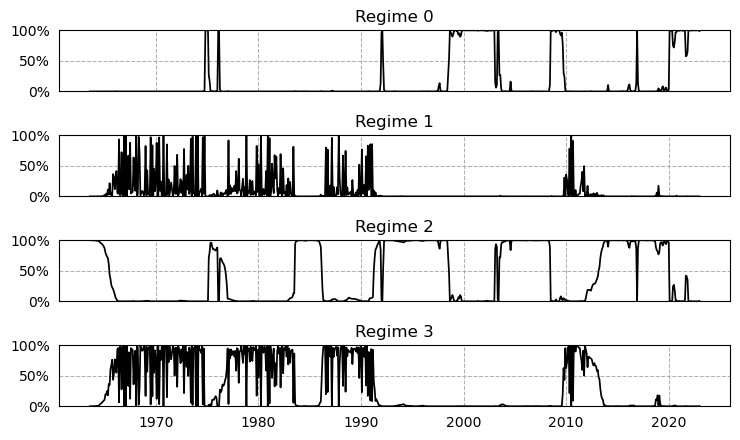

In [2]:
dt = '2022-12-31'

fig, axs = plt.subplots(nrows=emission_prob.shape[1], figsize=(width, height), sharex=True)
data = emission_prob.xs('2022-12-31')
for i, ax in enumerate(axs):
    ax.plot(data[i], color='black', lw=1.25)
    ax.set_title(f'Regime {i}')
    ax.tick_params(axis='both', bottom=False, left=False)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))
    ax.set_yticks([0, .5, 1])
    ax.grid(ls='--', lw=.75)
    ax.set_ylim(0, 1)

plt.tight_layout()
plt.savefig(f"{cfg.fldr}/img/emission_prob.pdf", dpi=dpi, transparent=True)
plt.show()

In [6]:
data.resample('Q').last()

,0,1,2,3
date,,,,
1963-09-30,0.000081,3.356964e-06,9.994929e-01,4.231119e-04
1963-12-31,0.000058,4.163449e-05,9.973030e-01,2.597015e-03
1964-03-31,0.000734,6.521421e-05,9.908377e-01,8.363044e-03
1964-06-30,0.000050,7.346896e-04,9.783184e-01,2.089641e-02
1964-09-30,0.000065,7.067021e-04,9.374692e-01,6.175866e-02
...,...,...,...,...
2021-12-31,1.000000,7.498415e-18,2.592076e-08,1.088780e-17
2022-03-31,0.999797,7.142908e-07,2.026135e-04,1.075347e-10
2022-06-30,0.999998,5.290756e-14,2.212256e-06,5.789850e-08
